# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Aluno 1:** Giovanna Paranhos
### **Matrícula 1:** 2023655476
### **Aluno 2:** Samir Saliba
### **Matrícula 1:** 2022685118

### **Tema:** Classificação em Dados Parametrizados de Biópsias de Câncer de Mama Canino
### **Base de dados:** [Google Drive](https://drive.google.com/drive/folders/1qeFJoe3Xb6XheJ91ynMauPMv-nh1_Wt6?usp=share_link)

## **1. Business Understanding**

Link para a sessão: [OpenAI](https://chat.openai.com/share/3b1de76c-aee8-4144-949b-822d86db41a2)

Certainly! CRISP-DM (Cross-Industry Standard Process for Data Mining) is a widely used framework for guiding the process of data mining or machine learning projects. Let's apply the CRISP-DM principles to write a Business Understanding section for a cancer subtype classification task:

---

### Business Understanding

#### 1. **Background:**
   Cancer is a complex and heterogeneous group of diseases with various subtypes that differ in terms of genetics, behavior, and response to treatment. Understanding and accurately classifying cancer subtypes is crucial for personalized medicine, enabling tailored treatment strategies and improving patient outcomes.

#### 2. **Objective:**
   The primary goal of this project is to develop a robust machine learning model for the classification of cancer subtypes based on molecular and genetic data. The model will assist healthcare professionals in making more informed decisions regarding treatment plans, prognosis, and potential therapeutic interventions.

#### 3. **Stakeholders:**
   - **Medical Professionals:** Oncologists and pathologists who will use the model predictions to enhance diagnosis and treatment planning.
   - **Patients:** Improved subtype classification can lead to more personalized and effective treatment options, potentially enhancing the quality of life for cancer patients.
   - **Research Community:** The results can contribute to ongoing research efforts in understanding the underlying biology of different cancer subtypes.

#### 4. **Scope:**
   - **Data Sources:** Utilize diverse datasets containing molecular and genetic information from various cancer patients.
   - **Cancer Types:** Initially focus on a specific cancer type or subtype, with the flexibility to extend the model to other cancer types in the future.
   - **Model Interpretability:** Emphasize the interpretability of the model predictions to ensure trust and acceptance among medical professionals.

#### 5. **Success Criteria:**
   - Achieve a high level of accuracy in cancer subtype classification.
   - Provide interpretable insights into the features driving subtype predictions.
   - Demonstrate the model's generalizability across different datasets.

#### 6. **Constraints and Challenges:**
   - **Data Quality:** Address potential challenges related to missing or noisy data.
   - **Interpretability vs. Complexity:** Balance the need for interpretability with the inherent complexity of molecular data.
   - **Regulatory Compliance:** Ensure compliance with healthcare regulations and privacy standards in handling patient data.

#### 7. **Anticipated Outcomes:**
   - Enhance the accuracy of cancer subtype classification, leading to more targeted and effective treatment strategies.
   - Contribute valuable insights into the molecular characteristics of different cancer subtypes.
   - Facilitate the development of future models for a broader range of cancer types.

#### 8. **Project Plan:**
   - **Phase 1 - Data Collection and Preprocessing:** Gather and preprocess diverse datasets containing molecular and genetic information.
   - **Phase 2 - Model Development:** Implement and train machine learning models for cancer subtype classification.
   - **Phase 3 - Model Evaluation and Validation:** Assess model performance using appropriate metrics and validate results with domain experts.
   - **Phase 4 - Deployment:** Deploy the model in a controlled environment and integrate it into existing medical workflows.
   - **Phase 5 - Monitoring and Maintenance:** Implement continuous monitoring and maintenance to ensure model effectiveness and adaptability.

By adhering to the CRISP-DM principles, this project aims to provide actionable insights that contribute to the advancement of cancer research and personalized patient care.

## **2. Data understanding (Entendimento dos dados)**

Link para a sessão: [OpenAI](https://chat.openai.com/share/3b1de76c-aee8-4144-949b-822d86db41a2)

Nesta fase, o objetivo é carregar os dados e fazer um entendimento preliminar de suas características. Por brevidade, utilizamos o mesmo código para carregamento dos dados que foi gerado pela LLM no tp anterior.

In [3]:
# INICIO CODIGO MANUAL
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd

data_directory = 'data'




# Get a list of all files in the data directory
files = os.listdir(data_directory)

# Create an empty list to store all DataFrames
all_data = []

# Load all samples
for file in files:
    file_path = os.path.join(data_directory, file)
    df = pd.read_excel(file_path)
    df['type'] = os.path.splitext(file)[0]  # Extract filename without extension
    all_data.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(all_data, ignore_index=True)
df = combined_df.drop(['Unnamed: 0', 'File'], axis=1)

# Display the first few rows of the concatenated DataFrame
print("Concatenated Data:")
print(df.info())

# FIM CODIGO MANUAL

Concatenated Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cell Segment Area                  1384 non-null   float64
 1   Cell Segment Circularity           1384 non-null   float64
 2   Cell Segment Coverage              1384 non-null   float64
 3   Cell Segment Eccentricity          1384 non-null   float64
 4   Cell Segment PL Angle SDI          1384 non-null   float64
 5   Cell Segment PL Coherence          1384 non-null   float64
 6   Cell Segment PL Entropy            1384 non-null   float64
 7   Cell Segment PL Local Coherence    1384 non-null   float64
 8   Cell Segment PL Mean               1384 non-null   float64
 9   Cell Segment PL STD                1384 non-null   float64
 10  Fibre Angle SDI                    1384 non-null   float64
 11  Fibre Network Connectivity         13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cell Segment Area                  1384 non-null   float64
 1   Cell Segment Circularity           1384 non-null   float64
 2   Cell Segment Coverage              1384 non-null   float64
 3   Cell Segment Eccentricity          1384 non-null   float64
 4   Cell Segment PL Angle SDI          1384 non-null   float64
 5   Cell Segment PL Coherence          1384 non-null   float64
 6   Cell Segment PL Entropy            1384 non-null   float64
 7   Cell Segment PL Local Coherence    1384 non-null   float64
 8   Cell Segment PL Mean               1384 non-null   float64
 9   Cell Segment PL STD                1384 non-null   float64
 10  Fibre Angle SDI                    1384 non-null   float64
 11  Fibre Network Connectivity         1384 non-null   float

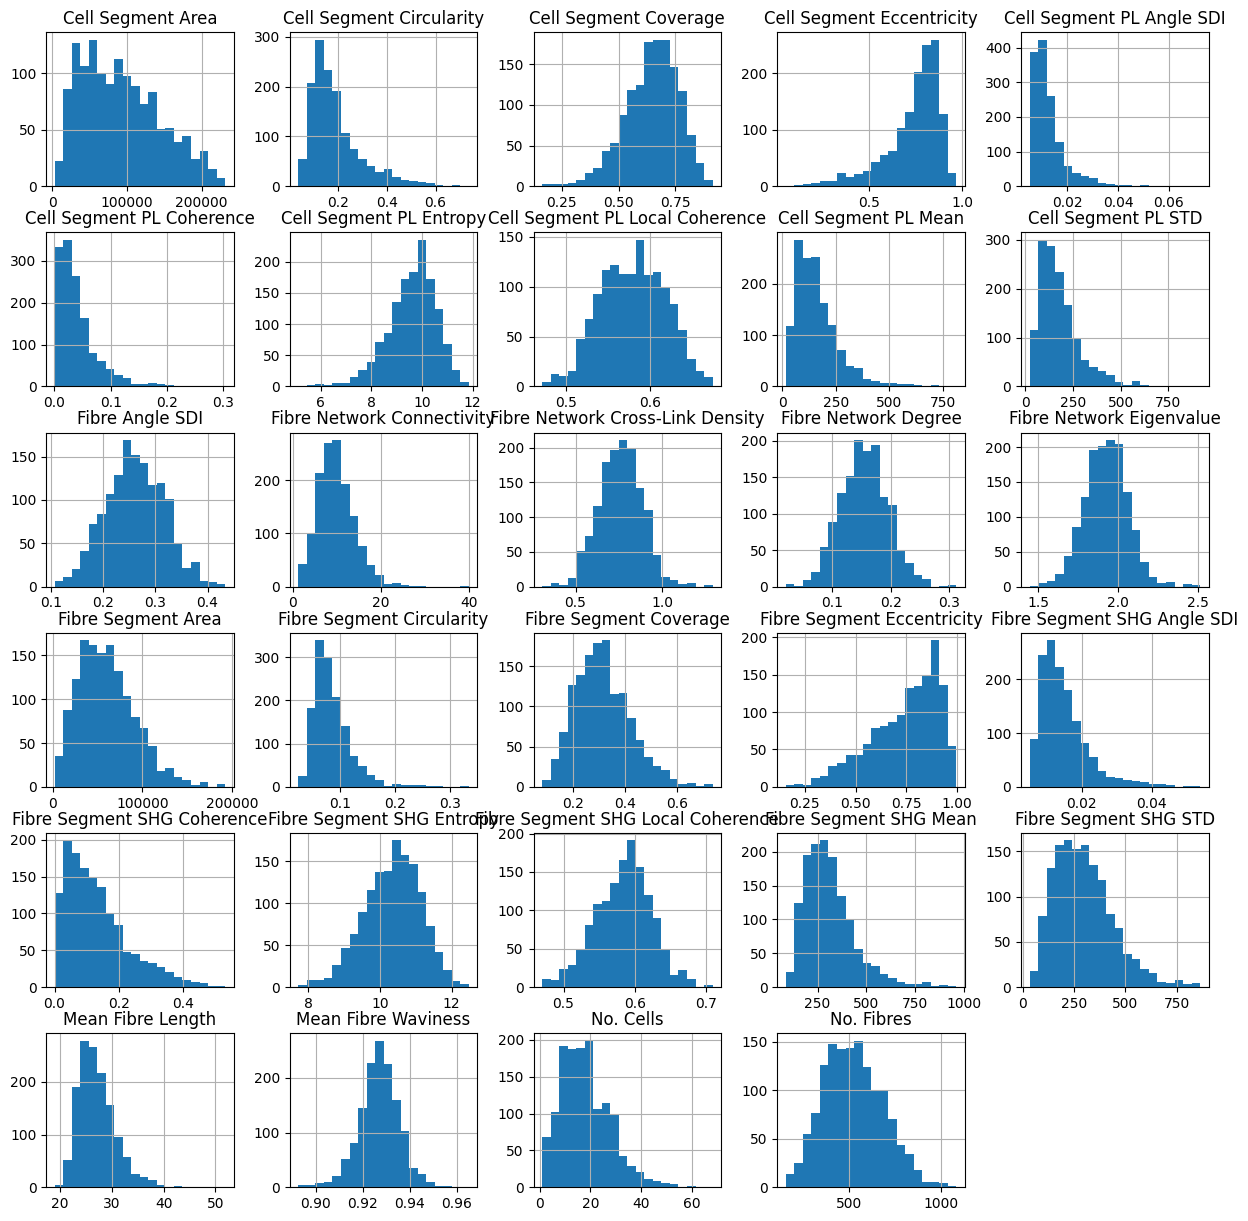

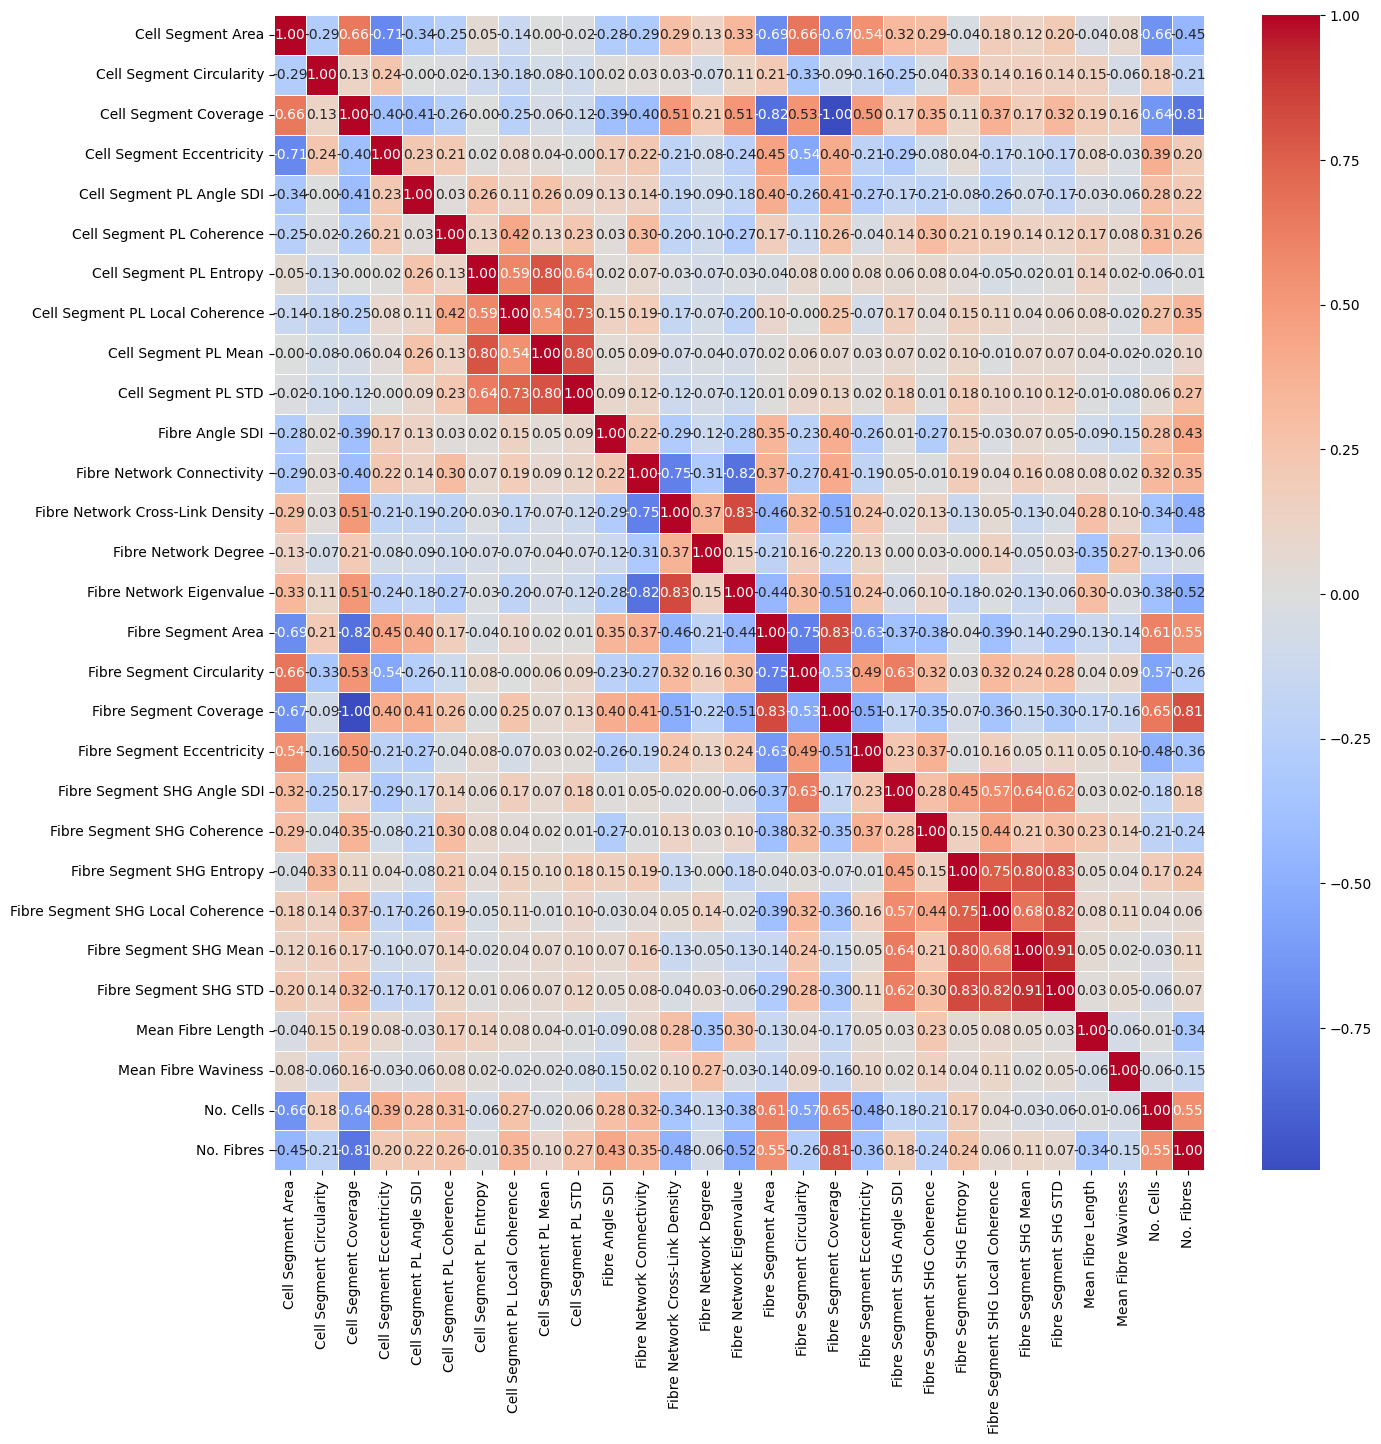

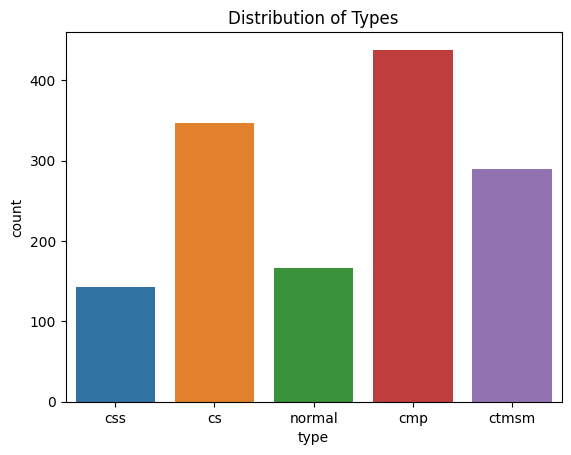

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Visualize the distribution of numerical features
df.hist(bins=20, figsize=(15, 15))
plt.show()

# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

# Visualize the distribution of the target variable ("type")
sns.countplot(x="type", data=df)
plt.title("Distribution of Types")
plt.show()


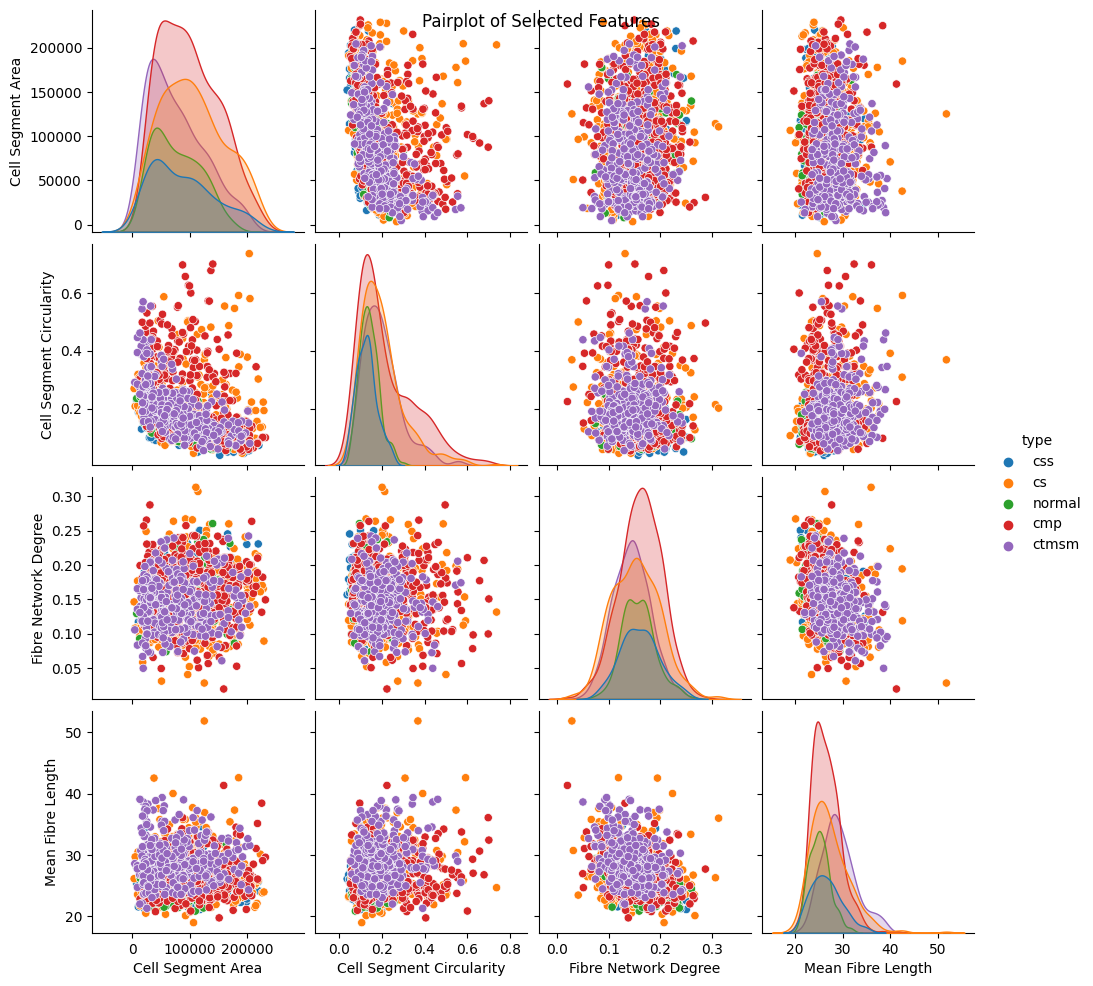

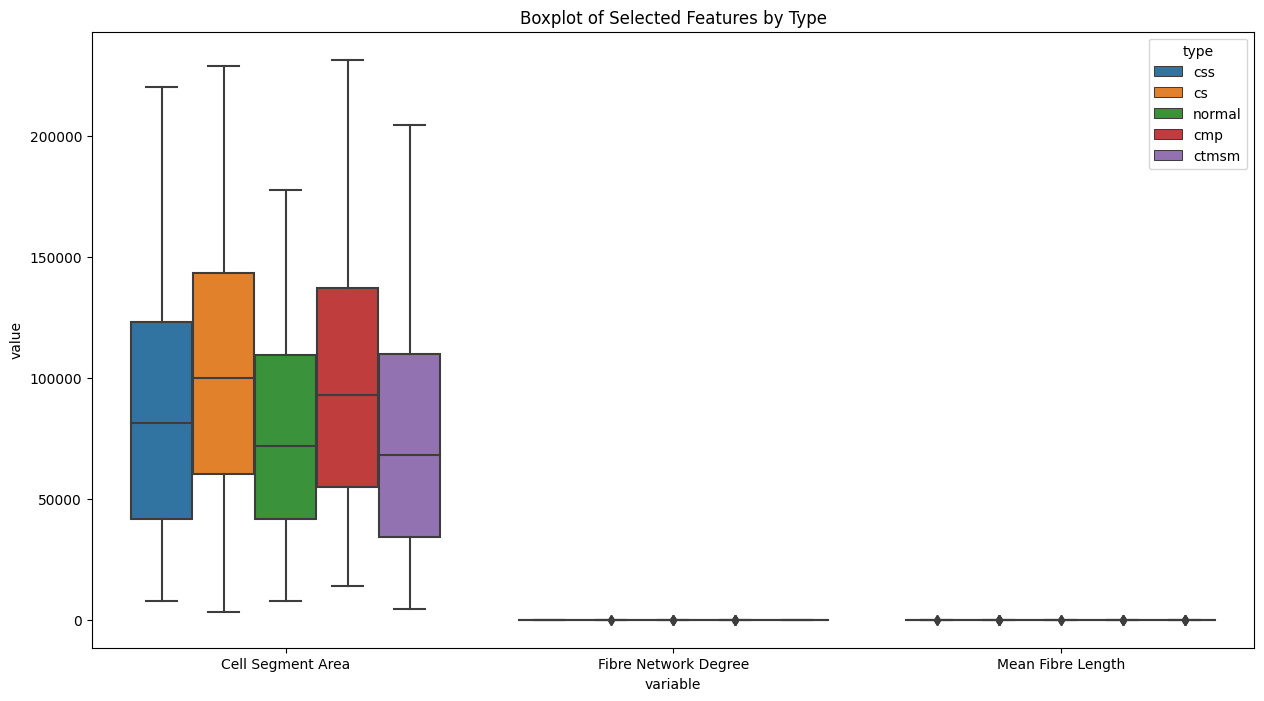

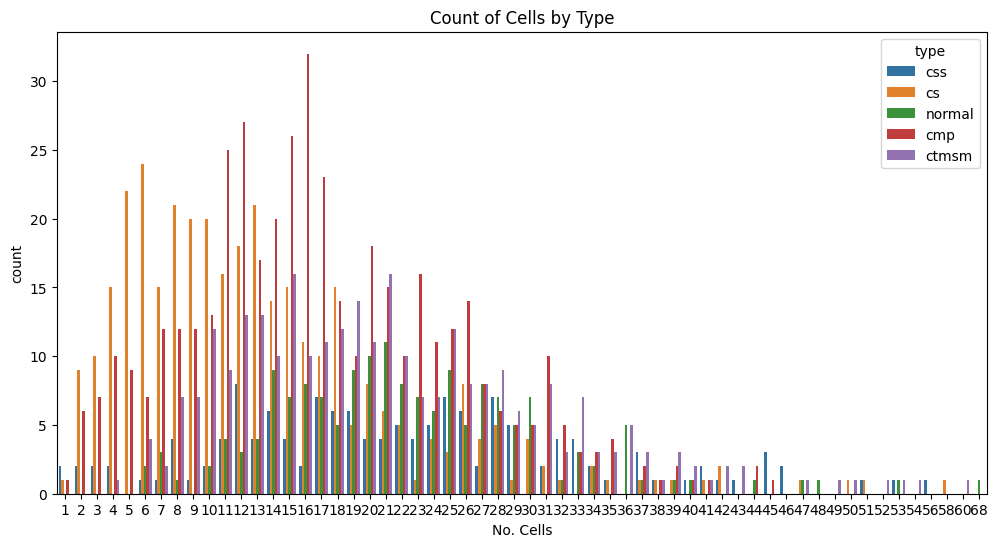

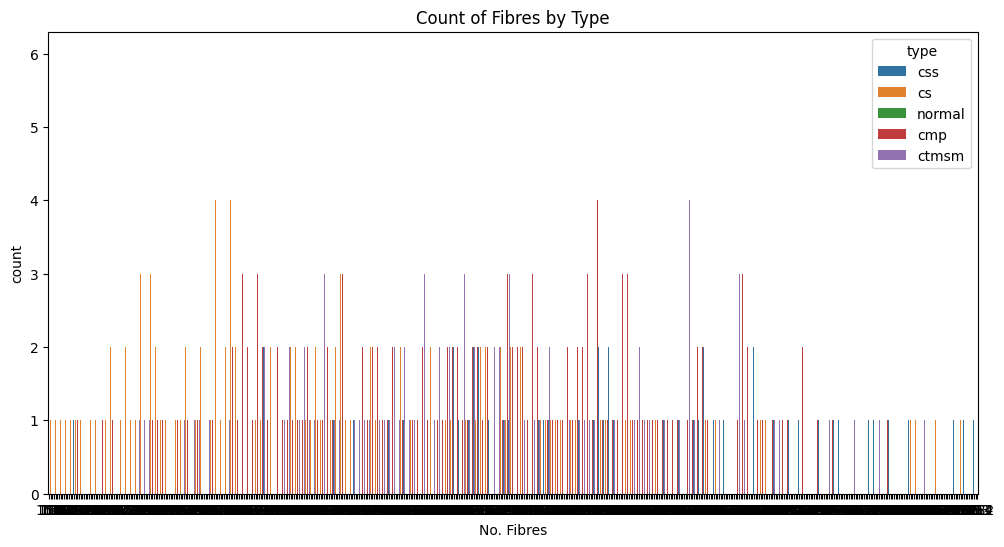

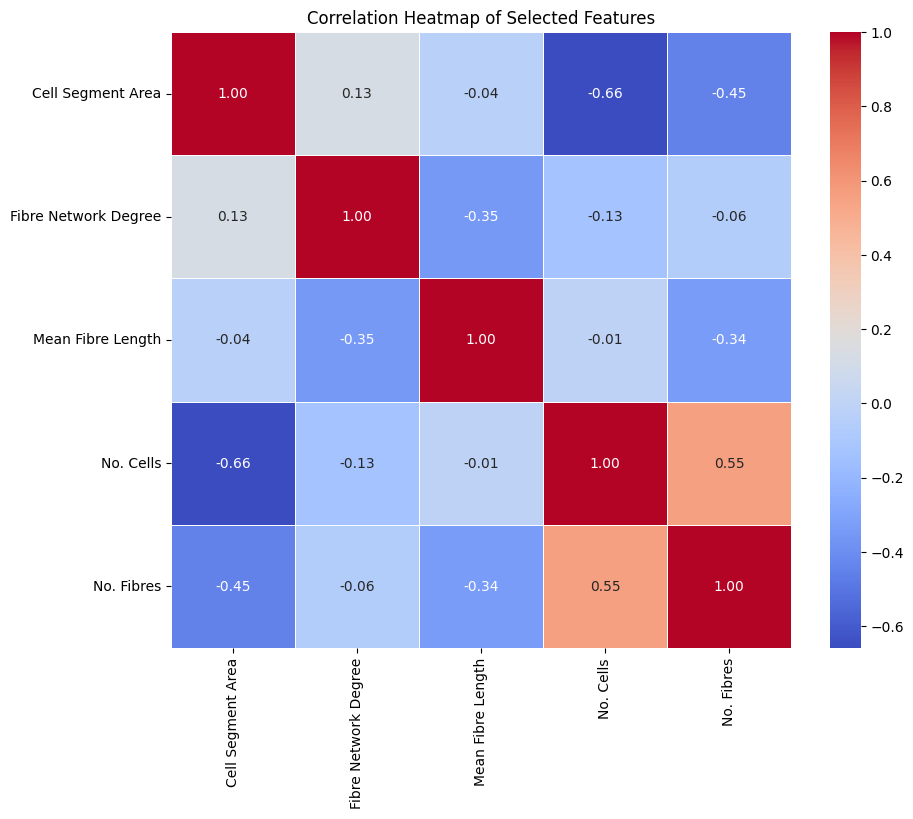

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in the variable 'df'

# Pairplot for selected numerical features
selected_features = ['Cell Segment Area', 'Cell Segment Circularity', 'Fibre Network Degree', 'Mean Fibre Length', 'type']
sns.pairplot(df[selected_features], hue='type', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features")
plt.show()

# Boxplot for selected numerical features
plt.figure(figsize=(15, 8))
selected_boxplot_features = ['Cell Segment Area', 'Fibre Network Degree', 'Mean Fibre Length']
df_melted = pd.melt(df, id_vars=['type'], value_vars=selected_boxplot_features)

sns.boxplot(x='variable', y='value', hue='type', data=df_melted)
plt.title("Boxplot of Selected Features by Type")
plt.show()

# Count plot for the number of cells and fibres
plt.figure(figsize=(12, 6))
sns.countplot(x='No. Cells', hue='type', data=df)
plt.title("Count of Cells by Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='No. Fibres', hue='type', data=df)
plt.title("Count of Fibres by Type")
plt.show()

# Correlation heatmap for selected features
selected_corr_features = ['Cell Segment Area', 'Fibre Network Degree', 'Mean Fibre Length', 'No. Cells', 'No. Fibres']
correlation_matrix_selected = df[selected_corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


## **3. Data preparation (Preparação dos dados)**

Link para a sessão: [OpenAI](https://chat.openai.com/share/e4c8bca0-8bfb-4e5e-879c-b32b3ed5e08d)

In [11]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your DataFrame is df

# Step 1: Check for Missing Values (Already checked in your case)

# Find the class with the most items
max_class_count = df['type'].value_counts().max()

# Upsample each class to have the same number of items as the maximum class
upsampled_data = pd.DataFrame()
for class_label, group in df.groupby('type'):
    upsampled_group = resample(group, replace=True, n_samples=max_class_count, random_state=42)
    upsampled_data = pd.concat([upsampled_data, upsampled_group])

# Check the new class distribution
print(upsampled_data['type'].value_counts())

# Steps 3-5: Split the Data (No encoding of labels, no scaling)
X = upsampled_data.drop('type', axis=1)  # Features
y = upsampled_data['type']                # Target variable

# No encoding of labels and no scaling of numerical features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cmp       438
cs        438
css       438
ctmsm     438
normal    438
Name: type, dtype: int64


Este dataset tem features com significados diferentes, e as features onde cabe normalização já estão normalizadas, portanto optamos por pular esta etapa.

Também não fizemos encoding, pois não é necessário nessa tarefa.

Preferimos por fazer upsampling de todas as classes, e não remover outliers. Por se tratar de um problema envolvendo câncer, pontos fora da curva normal são de grande importância.

Por fim, deixamos para fazer o data splitting na etapa de modelagem, para que seja feito um cross-validation.

## **4. Modeling**

Link para a sessão: [OpenAI](https://chat.openai.com/share/b484a9b6-0244-4c0b-b964-c0afe73281d4)

In [19]:
df= upsampled_data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 758 to 499
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cell Segment Area                  2190 non-null   float64
 1   Cell Segment Circularity           2190 non-null   float64
 2   Cell Segment Coverage              2190 non-null   float64
 3   Cell Segment Eccentricity          2190 non-null   float64
 4   Cell Segment PL Angle SDI          2190 non-null   float64
 5   Cell Segment PL Coherence          2190 non-null   float64
 6   Cell Segment PL Entropy            2190 non-null   float64
 7   Cell Segment PL Local Coherence    2190 non-null   float64
 8   Cell Segment PL Mean               2190 non-null   float64
 9   Cell Segment PL STD                2190 non-null   float64
 10  Fibre Angle SDI                    2190 non-null   float64
 11  Fibre Network Connectivity         2190 non-null   floa

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame
X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f'\n{name} Classifier:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')



Random Forest Classifier:
Accuracy: 0.9224
Classification Report:
              precision    recall  f1-score   support

         cmp       0.90      0.83      0.86        96
          cs       0.91      0.91      0.91        82
         css       0.94      0.99      0.96        78
       ctmsm       0.94      0.89      0.92        92
      normal       0.92      1.00      0.96        90

    accuracy                           0.92       438
   macro avg       0.92      0.93      0.92       438
weighted avg       0.92      0.92      0.92       438


SVM Classifier:
Accuracy: 0.2694
Classification Report:
              precision    recall  f1-score   support

         cmp       0.20      0.20      0.20        96
          cs       0.26      0.48      0.33        82
         css       0.21      0.05      0.08        78
       ctmsm       0.35      0.24      0.28        92
      normal       0.30      0.38      0.34        90

    accuracy                           0.27       438
   macr

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame
X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print('\nRandom Forest Classifier:')
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_rf)}')



Random Forest Classifier:
Accuracy: 0.9155
Classification Report:
              precision    recall  f1-score   support

         cmp       0.91      0.78      0.84        96
          cs       0.90      0.93      0.92        82
         css       0.93      0.99      0.96        78
       ctmsm       0.92      0.90      0.91        92
      normal       0.91      1.00      0.95        90

    accuracy                           0.92       438
   macro avg       0.92      0.92      0.92       438
weighted avg       0.92      0.92      0.91       438



## **5. Evaluation**

Link para a sessão: [OpenAI](https://chat.openai.com/share/ed8679a8-f911-45f9-a0e9-16e2b12f9fe0)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming random_forest_classifier is your trained model
# Assuming X_test and y_test are your test data and labels

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test) # corrigi a variavel que eu errei aqui

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.9155
Confusion Matrix:
[[75  6  1  5  9]
 [ 2 76  3  1  0]
 [ 0  0 77  1  0]
 [ 5  2  2 83  0]
 [ 0  0  0  0 90]]
Classification Report:
              precision    recall  f1-score   support

         cmp       0.91      0.78      0.84        96
          cs       0.90      0.93      0.92        82
         css       0.93      0.99      0.96        78
       ctmsm       0.92      0.90      0.91        92
      normal       0.91      1.00      0.95        90

    accuracy                           0.92       438
   macro avg       0.92      0.92      0.92       438
weighted avg       0.92      0.92      0.91       438



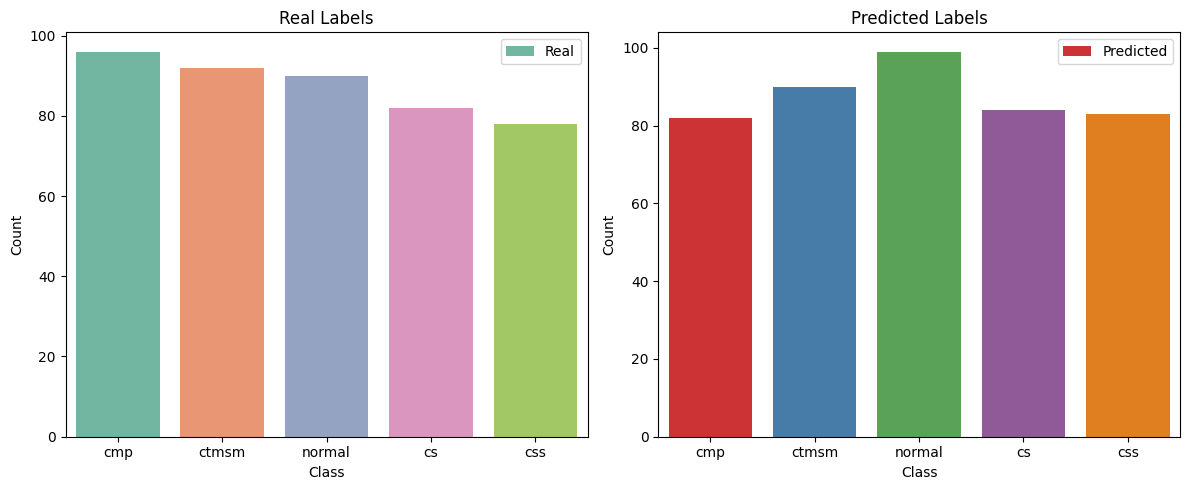

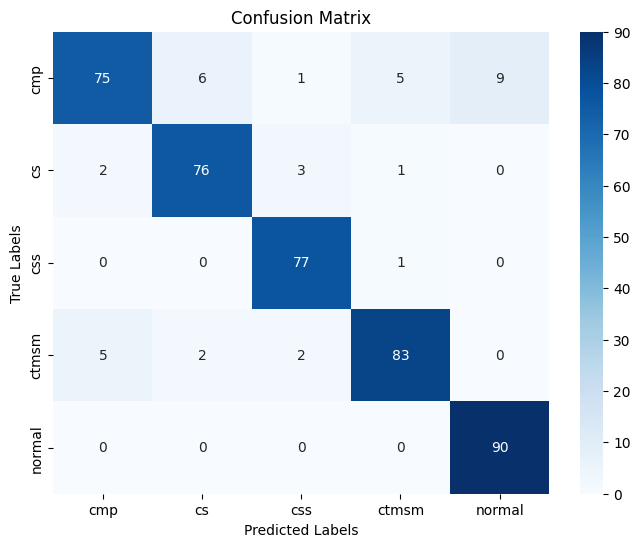

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming random_forest_classifier is your trained model
# Assuming X_test and y_test are your test data and labels

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

### INICIO CODIGO MANUAL
labels = y_test.unique()
labels.sort()
params = {"xticklabels":labels, "yticklabels":labels}
# Esses params serao injetados na matriz de confusao abaixo para melhor visualizacao
### FIM CODIGO MANUAL

# Plot real vs predicted counts
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_test, palette='Set2', label='Real')
plt.title('Real Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
sns.countplot(x=y_pred, palette='Set1', label='Predicted')
plt.title('Predicted Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix with explicit labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            **params)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


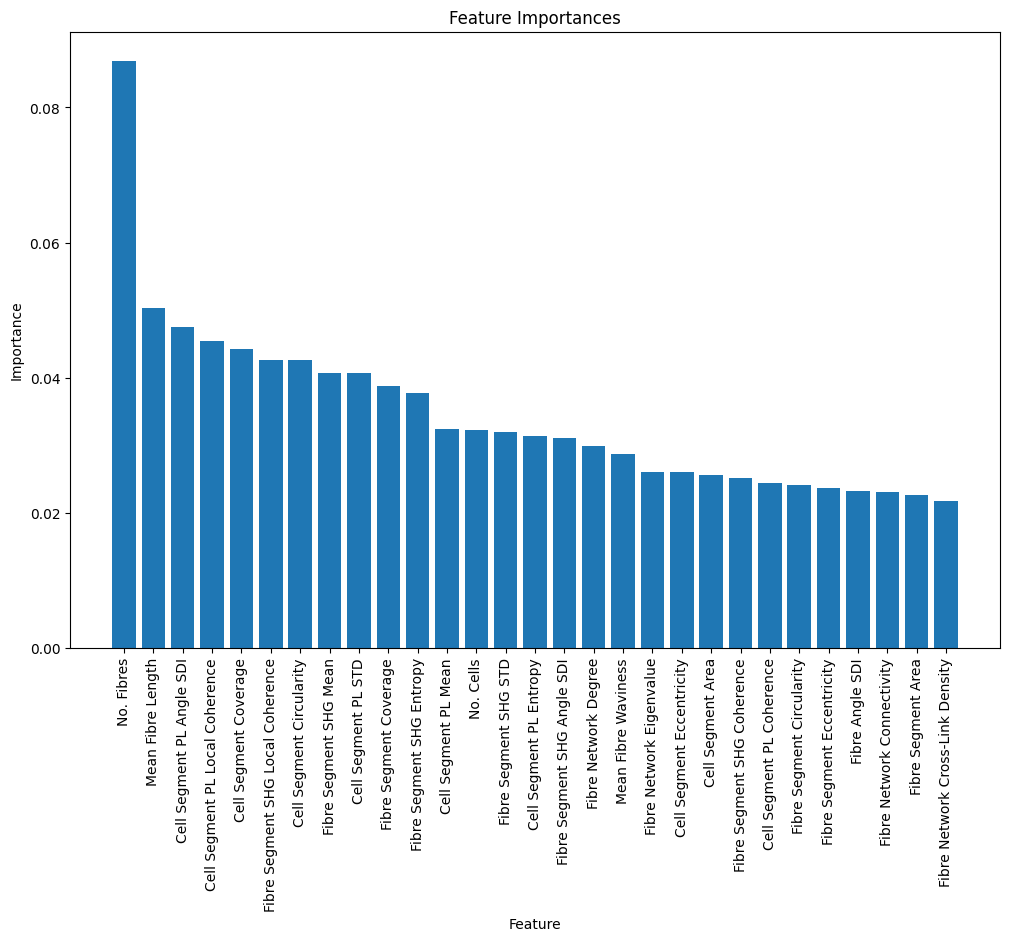

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming random_forest_classifier is your trained model

# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Get the names of your features (assuming you have them in a DataFrame)
feature_names = X_test.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(X_test.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_test.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


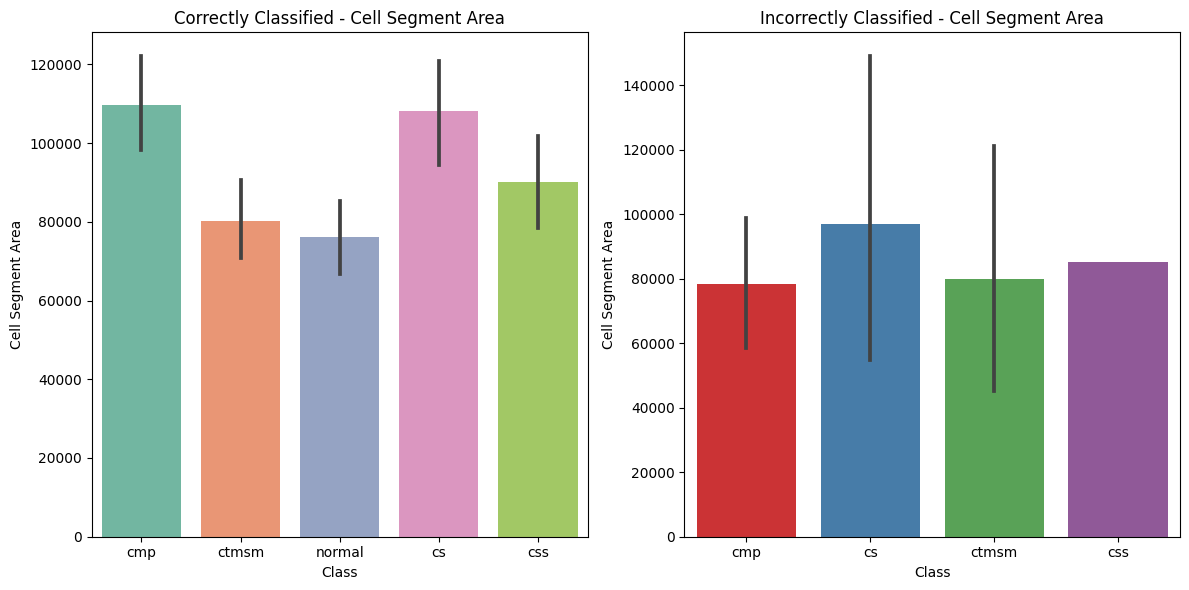

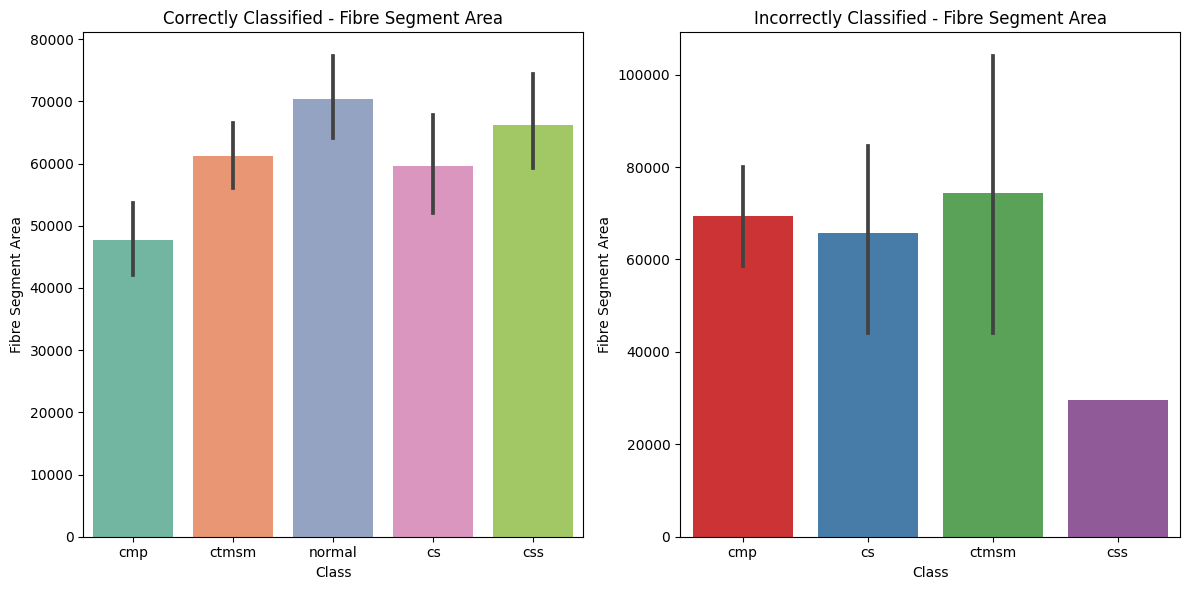

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming random_forest_classifier is your trained model
# Assuming X_test and y_test are your test data and labels

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Identify correctly and incorrectly classified indices
correctly_classified = (y_pred == y_test)
incorrectly_classified = ~correctly_classified

# Select two features for comparison
selected_features = ['Cell Segment Area', 'Fibre Segment Area']

# Plot bar plots for each selected feature
for feature in selected_features:
    plt.figure(figsize=(12, 6))

    # Bar plot for correctly classified items
    plt.subplot(1, 2, 1)
    sns.barplot(x=y_test[correctly_classified], y=X_test.loc[correctly_classified, feature], palette='Set2')
    plt.title(f'Correctly Classified - {feature}')
    plt.xlabel('Class')
    plt.ylabel(feature)

    # Bar plot for incorrectly classified items
    plt.subplot(1, 2, 2)
    sns.barplot(x=y_test[incorrectly_classified], y=X_test.loc[incorrectly_classified, feature], palette='Set1')
    plt.title(f'Incorrectly Classified - {feature}')
    plt.xlabel('Class')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()
